# Arquitecturas populares de CNN

## LeNet: (pienso que Le=Lecun de Yann Lecun, Net=network)
Hay un grupo de redes LeNet:
[Grupo LeNet](https://sh-tsang.medium.com/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17)

Nos concentramos en la red LeNet5 : 1998
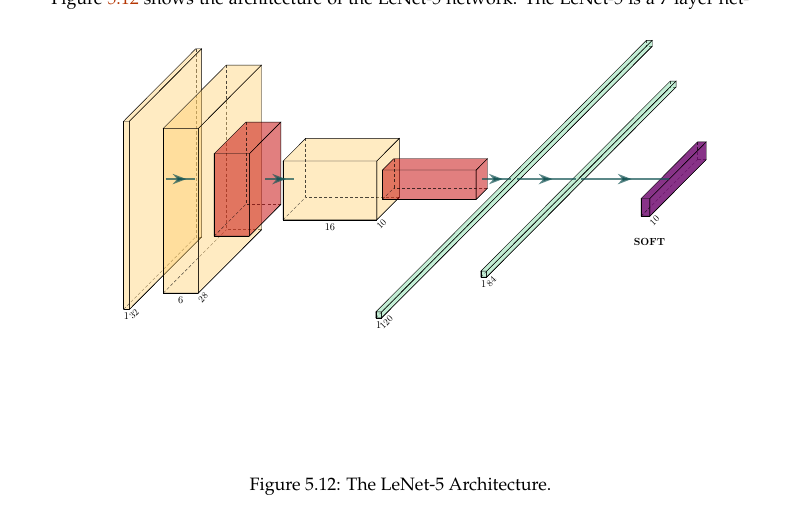




El problema que resolvemos es el MNIST (determinar  un digito, $0,1,2, \cdots 9$ manuscrito.

Un resumen de la red
* 3 capas convolucionales (en clase hacemos solo 2 y una conversion a "flatten", de tarea queda cambiar esta por una convolucional)
* 2 avarage pooling
* 1 capa "fully connected" (densa) luego de "flattening"
* Una capa de clasificacion "softmax"

Describamos la red en detalle y luego la implementamos en 
Python.

* L0: La capa de entrada $32 \times 32$ pixeles (para nosotros $28 \times 28$). Tomados del 
[MNIST](http://yann.lecun.com/exdb/mnist/)  databse

* L1: (C1). Es una convolucion con kernel $5 \times 5$ , no padding $p=0$, stride $s=1$, se reduce a un tamano de $28 \times 28$ ($28 = (N-k+p)/s +1 = (32-5)/1+1=28$.
Se  producen 6 filtros. La dimension de la caja es
$28 \times 28 \times 6$. Los parametros de entrenamiento son

$$ \text{parametros de entrenamiento} = (5x5x1 + 1 )\times 6 = 156 $$

* L1P: Poolin layer 1 tambien se conoce como $S2$. Es average (promedio) kernel $2 \times 2$ y 6 filtros de salida. El tamano de la salida es (no hay padding. $p=0$)

$$\text{ # salida} = \left [ \frac{28-2}{2} + 1  \right ] \times  \left [ \frac{28-2}{2} + 1  \right ] = 14 \times 14 \times 6  = 1176 $$

*L2: Otra convolucion (C2). Con kernel $5 \times 5$ y 16 filtros de salida. Padding $p=0$, stride $s=1$.  El output tiene salida
$(15 -5)/1+1=10$, $10 \times 10 \times 16$. El numero de parametros es:

$$ \text{# parametros} = (5 \times 5 \times 6 + 1) \times 16 = 2416$$
Las dos capas convolucionales hasta el momento tienen activaciones de tanh (tangente hiperbolica) en el trabajo original, pero nosotros usamos ReLU. Produce mejores resultados.

* LP2: Average pooling layer 2. Kernel $2 \times 2 $, (stride 2)
se llama $S2$ tiene 16 filtros (feature maps), la salida seria
$(10-2)/2 +1 = 5$  es  $5 \times 5$. 


* L3: Tercera capa convolucional (C3). Kernel de $5 \times 5$, strides $s=1$, no padding p=0$. $(5-5)/1+1=1$. Tienes 120 filtros de salida. El tamano de la salida 

$1 \times 1 \times 120$

* L4: Fully connected (densa) de 120 entradas a 84 salidas. El tamano de los parametros es

$$ (120+1) \times 84  =10164$$


Finalmente estos parametros pasan por un "softmax" layer que los clasifica como digios del 0 al 9

[Demo de Yann Lecun](http://yann.lecun.com/exdb/lenet/index.html)








## Implemantacion de la LeNet-5 Network

### Cargar librerias, leer datos y preprocesar (normalizacion categorizacion

In [ ]:
# importar librerias:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical # one-hot encoded
from keras.utils.vis_utils import plot_model

In [ ]:
# cargar los datos
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
# estudiemos los tamanos de los retornos
print("The size of train_x is : {}".format(train_x.shape))
print("The size of train_y is : {}".format(train_y.shape))
print("The size of test_x is : {}".format(test_x.shape))
print("The size of test_y is : {}".format(test_x.shape))



The size of train_x is : (60000, 28, 28)
The size of train_y is : (60000,)
The size of test_x is : (10000, 28, 28)
The size of test_y is : (10000, 28, 28)


In [ ]:
# reshape de los datos de entrenamiento a tensores de orden 4
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

# normalizamos
train_x = train_x/255.0
test_x = test_x/255.0

# one-hot encoding
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

## Ensamblaje de arquitectura


In [ ]:
# instanciacion del modelo
model = Sequential()

# agregar capa convolucional 1
# la forma de la entrada (28 x 28), originalmente 32 x 32
# numero de filtros 6
# kernel 5 x 5
# padding p=0
# strides s=1
# tamano del feature map (28-5+2(0)/1+1= 24.  La salida es 24 x 24 x 6
# numero de parametros de entrenamiento (5x5+1)x6 = 156
# activacion ReLU (original tanh)

model.add(Conv2D( filters=6, 
                 kernel_size=5,
                 strides=1,
                 activation='relu',
                 input_shape=(28,28,1)))

# average pooling layer P1
# Input 24 x 24
# filter size 2 x 2
# padding p=0
# strides 2 
# output (24-2)/2 +1 = 12,   (12 x 12 )

model.add(AvgPool2D(pool_size=(2,2)))

# segunda capa convolucional C2
# la entrada es 12 x 12 
# el filtro (kernel) 5 x 5
# filtros de salida 16
# padding 0
# strides s=1
# salida (12-5+1=8)  es 8decir 8x8
# numero de parametros de entrenamiento (5 x 5 x 6 + 1)x16 = 2416

model.add(Conv2D( filters=16,
                 kernel_size=(5,5),
                 activation='relu'))
# la segunda average pooling layer
# la entrada es (8  x 8 )
# el kernel 2 x 2 
# padding p=0
# tamano de la salida (8-2)/2+1 = 4. La salida es 4x4x16=256
model.add(AvgPool2D(pool_size=(2,2)))

# no puedo hacer una convolcion con un kernel 5x5
# La puedo hacer con un kernel de 4x4 (tarea)
# en vez de esto hacemos un flatten 
model.add(Flatten())

# creamos una capa densa de 256 a 120
# numero de entrada 256
# numero de salida 84
# numpero de parametros (256+1)*120=30840
model.add(Dense(120, activation='relu'))

# densa de 120 a 84 con un numpar 121*84=10164
model.add(Dense(84, activation='relu'))



# capa de clasificacion softmax
# numero de entradas 84
# numero de salidas 10
# numero de parametros (84+1)*10 = 850

model.add(Dense(10, activation='relu'))
model.summary()








Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

### Compilary entrenar (training)

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# model.fit(train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

# model.compile( loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#model.fit (train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

model.compile( loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit (train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.8832 - val_loss: nan - val_accuracy: 0.8878
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8860 - val_loss: nan - val_accuracy: 0.8858
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8864 - val_loss: 1.7090 - val_accuracy: 0.8833
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8716 - val_loss: 1.7067 - val_accuracy: 0.8829
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8644 - val_loss: 1.7635 - val_accuracy: 0.8757
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8793 - val_loss: nan - val_accuracy: 0.8827
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.8812 - val_loss: nan - val_accuracy: 0.8832
Epoch 8/20
469/469 [===================

In [ ]:
score = model.evaluate(test_x, test_y)
score

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.8904


[nan, 0.8903999924659729]

### Graficar resultados

In [ ]:
import matplotlib.pyplot as plt

def plot_example(X,y, y_pred=None):
 
    # 9 graficas
    # parametros:
    # -x : las muestras de entrenamiento
    # -y : las etiquetas reales
    # -y_pred: las predicciones en las etiquetas


    # creamos un marco de 3x3 graficas
    fig, axes = plt.subplots(3,3)
    fig.set_size_inches(18,18)
    fig.subplots_adjust(hspace=1.99, wspace=1.99)

    x, y = X[:9, ... , 0], y[:9]

    for i , ax in enumerate(axes.flat):
        # grafico la imagen
        ax.imshow(x[i])

        # las etiquetas
        if y_pred is None:
            x_label="True: {0}".format(y[i])
        else:
            xlabel="True: {0}, Pred: {1}".format(y[i], y_pred[i])

        # muestre las etiquetas
        ax.set_xlabel(xlabel)

    # removemos los tics
    ax.set_xticks([])
    ax.set_yticks([])

    # muestre la graphica
    plt.show()






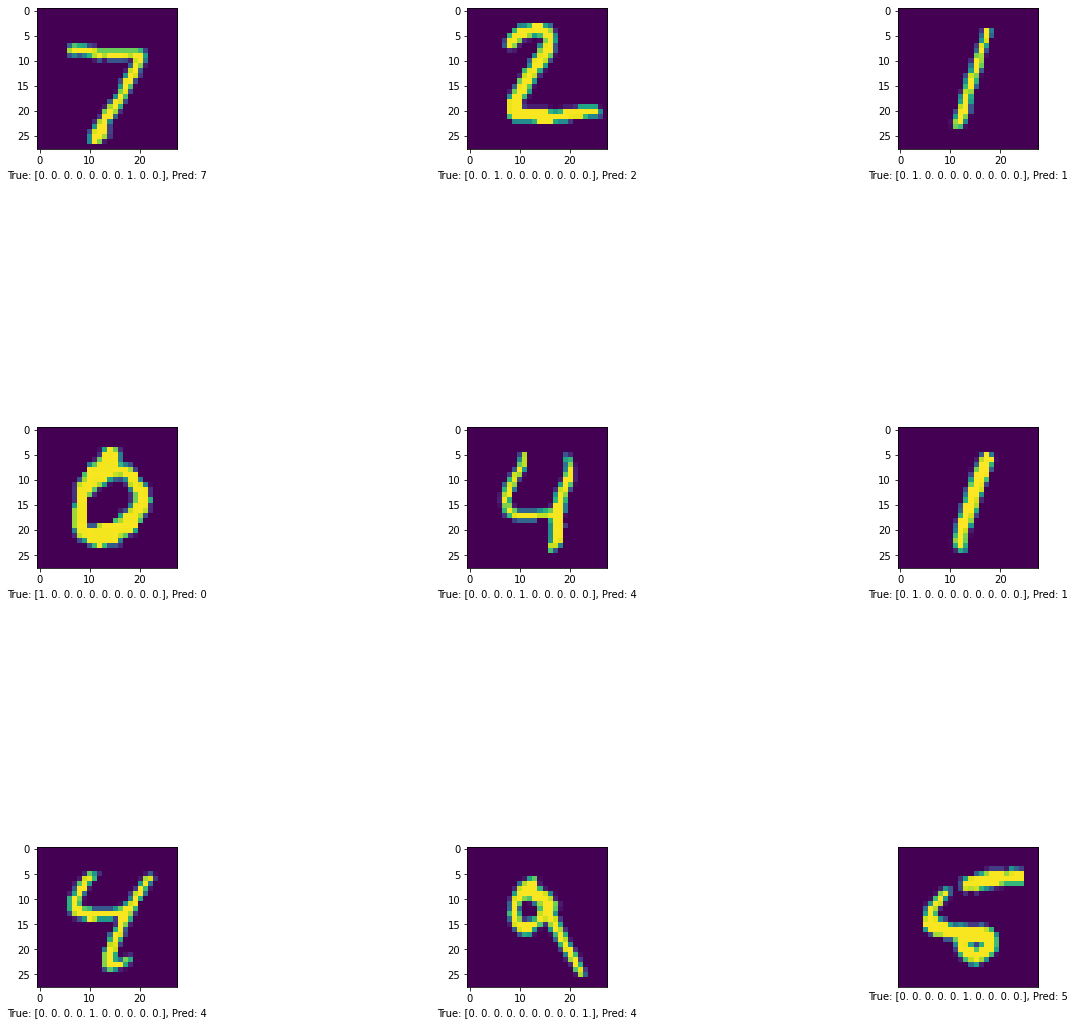

In [ ]:
# salvemos el modelo
import tensorflow as tf
import numpy as np


model.save("lenet5_model.h5")
model = tf.keras.models.load_model('lenet5_model.h5')


# hacer predicciones
predictions = model.predict(test_x)

# tomemos las y predicted
pred_y = np.argmax(predictions, axis=1)

# graficar
plot_example(test_x, test_y, pred_y)


